In [1]:
import geopandas as gpd
from tqdm import tqdm
from shapely.validation import explain_validity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import calendar
from itertools import cycle

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [415]:
os.chdir("../scripts")
from clustering_operations import *
from HierarchicalClusteringOptimized import HierarchicalClustering

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 41%|████      | 34240/84460 [01:27<02:08, 391.47it/s]

In [375]:
file = "../data/shapefiles/FAPAN_domain_fixed_geometry/FAPAN_domain_fixed_geometry.shp"    

# open file
shp = gpd.read_file(file)

In [341]:
shp['validity'] = shp.apply(lambda row: explain_validity(row.geometry), axis=1)
shp[shp['validity'] != 'Valid Geometry'].shape

(0, 22)

when computing neighbours these geometries are still invalid: 4342, 15720, 19878

In [376]:
df = pd.read_csv("../data/FAPAN204_05.csv", sep=',')

In [382]:
shp = shp[shp["SUBID"].isin(df["SUBID"])].reset_index(drop=True)

In [383]:
df['SUBID'] = df['SUBID'].astype(int).astype(str)
shp['SUBID'] = shp['SUBID'].astype(int).astype(str)

In [387]:
print(df.shape)
print(shp.shape)

(33775, 207)
(33775, 21)


 97%|█████████▋| 30365/31300 [48:51:51<1:30:16,  5.79s/it]


<AxesSubplot:>

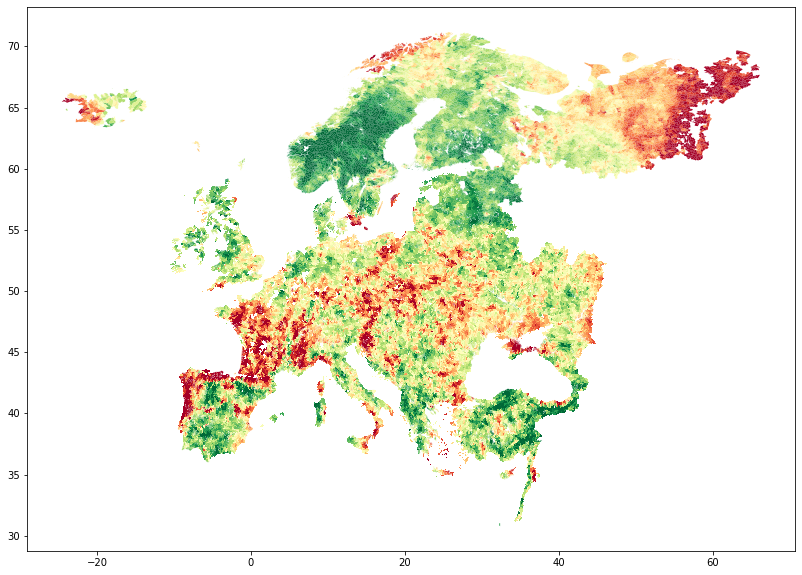

In [385]:
shp.plot(figsize=(16,10), column=df['198'], cmap='RdYlGn', vmin=-2, vmax=2)

In [393]:
df.head()

,SUBID,x,y,1,2,3,4,5,6,7,...,195,196,197,198,199,200,201,202,203,204
0,8801544,-22.5854,65.7710,NaN,NaN,NaN,NaN,-1.318167,-0.710667,-1.528167,...,NaN,-1.370000,-0.260333,-0.206061,0.564500,0.652833,0.734500,NaN,NaN,NaN
1,8801548,-24.4720,65.5149,NaN,NaN,NaN,NaN,-0.671554,-0.407242,-0.516090,...,NaN,-0.882667,-0.690604,-2.733667,-0.385919,0.924309,0.417711,NaN,NaN,NaN
2,8000005,9.3096,59.1909,NaN,NaN,0.316444,0.187556,0.371778,-0.197000,-0.361333,...,NaN,-0.461184,1.374222,0.705667,0.906444,0.006111,0.671000,1.385000,NaN,NaN
3,8115258,8.7466,59.1359,NaN,NaN,-0.092833,-0.245083,0.815444,-0.115556,-0.607519,...,NaN,-1.772971,1.125889,0.715222,1.261407,-0.258074,-0.028667,-0.118792,NaN,NaN
4,8115717,9.2398,58.9271,NaN,NaN,1.011778,0.242000,-0.082444,-1.187556,-0.751778,...,NaN,-0.675084,1.587889,1.250889,1.530667,-0.349889,0.421222,1.035111,NaN,NaN


In [406]:
def select_columns_by_months(dataframe, selected_months):
    selected_columns = []

    for i in range((dataframe.shape[1] - 3) // 12):
        selected_columns.extend([month + i * 12 for month in selected_months])

    all_columns = np.arange(1, dataframe.shape[1]-2)
    columns_to_drop = np.setdiff1d(all_columns, np.array(selected_columns))
    columns_to_drop = [str(i) for i in columns_to_drop]

    filtered_dataframe = dataframe.drop(columns=columns_to_drop, axis=1)

    return filtered_dataframe

In [407]:
df = select_columns_by_months(df, [4,5,6,7,8,9])
df.shape

(33775, 105)

In [409]:
df.head()

,SUBID,x,y,4,5,6,7,8,9,16,...,186,187,188,189,196,197,198,199,200,201
0,8000005,9.3096,59.1909,0.187556,0.371778,-0.197000,-0.361333,1.086444,0.963111,-0.534333,...,0.341667,0.502111,0.461333,-1.894111,-0.461184,1.374222,0.705667,0.906444,0.006111,0.671000
1,8115258,8.7466,59.1359,-0.245083,0.815444,-0.115556,-0.607519,1.011852,0.708333,-0.594933,...,0.314370,0.490519,-0.576593,-2.895556,-1.772971,1.125889,0.715222,1.261407,-0.258074,-0.028667
2,8115717,9.2398,58.9271,0.242000,-0.082444,-1.187556,-0.751778,0.860667,1.069778,-0.592444,...,0.406667,0.541444,0.268444,-1.212222,-0.675084,1.587889,1.250889,1.530667,-0.349889,0.421222
3,8102609,9.1371,58.9647,0.371667,0.523533,-0.586733,-0.437733,0.851200,1.108467,-1.133250,...,0.870133,0.855667,0.562333,-2.557400,NaN,1.233200,1.278556,1.541600,-0.056200,-0.116467
4,8103951,9.0461,59.1257,0.090185,0.343000,-0.465481,-0.418556,0.877259,1.107815,-0.699926,...,0.779556,0.867926,0.726259,-2.251519,NaN,1.317556,0.857733,1.314333,0.112074,-0.040444


In [408]:
#df = df.dropna()
selected_columns = df.iloc[:, 3:]
df = df[(selected_columns.isnull().sum(axis=1)<=4)]

df = df.reset_index(drop=True)
print(df.shape)

shp = shp[shp['SUBID'].isin(df['SUBID'])]
shp = shp.reset_index(drop=True)
print(shp.shape)

(30219, 105)
(30219, 21)


## Compute neighbours

In [410]:
# add neighbours column
shp["NEIGHBOURS"] = None  
    
progress_bar = tqdm(total=shp.shape[0], position=0, leave=True, smoothing=0)

for index, country in shp.iterrows():   
    #print(index)
    # get 'not disjoint' countries
    neighbours = shp[~shp.geometry.disjoint(country.geometry)]['SUBID'].tolist()

    # remove own name of the country from the list
    neighbours = [ name for name in neighbours if country['SUBID'] != name ]

    # add names of neighbours as neighbours value
    shp.at[index, "NEIGHBOURS"] = neighbours
                   
    progress_bar.update(1)  

100%|██████████| 31300/31300 [51:07:59<00:00,  5.88s/it]


100%|██████████| 30219/30219 [05:51<00:00, 86.07it/s]

In [411]:
# Create a set to store unique pairs
neighbours_pairs = set()

# Iterate over each row and generate pairs
for index, row in shp.iterrows():
    subid = row['SUBID']
    neighbors = row['NEIGHBOURS']
    
    # Generate pairs and add to the set
    for neighbor in neighbors:
        pair = tuple(sorted([subid, neighbor]))
        neighbours_pairs.add(pair)

df_without_neighbours = shp[shp["NEIGHBOURS"].apply(len)==0][["SUBID"]]
without_neighbours = df_without_neighbours["SUBID"].to_list()      

## Compute and visualize clusterings

In [412]:
# Transpose the DataFrame and set the "SUBID" column as the column names
df = df.set_index('SUBID').T
df = df.reset_index(drop=True)
df = df.rename_axis(None, axis=1)
df = df.astype(float)
df.head()

,8000005,8115258,8115717,8102609,8103951,8000007,8000006,8210493,8210176,8000018,...,9566462,9566535,9566624,9566991,9566510,9566395,9581818,9524166,9581815,9723401
0,9.309600,8.746600,9.239800,9.137100,9.046100,9.267600,9.493300,33.138100,33.658400,34.310100,...,0.358300,0.429200,0.275000,0.220800,0.164200,0.115800,-5.034200,-1.0625,-5.104200,29.1942
1,59.190900,59.135900,58.927100,58.964700,59.125700,59.117400,59.131400,66.106300,66.222200,64.321300,...,48.991700,49.212500,48.954200,49.125000,49.187500,49.317500,55.784200,45.5008,56.008300,36.6958
2,0.187556,-0.245083,0.242000,0.371667,0.090185,0.109810,0.305719,-0.454667,-0.634556,-0.557667,...,0.831286,0.821733,0.943467,0.689667,0.638083,0.870333,0.682400,-0.6570,0.463182,-0.2001
3,0.371778,0.815444,-0.082444,0.523533,0.343000,0.041429,0.364721,0.485061,0.307556,0.219333,...,-0.766611,-0.540400,-0.744600,-1.734000,-1.239000,-0.808333,-0.305400,0.1570,-0.502667,0.3108
4,-0.197000,-0.115556,-1.187556,-0.586733,-0.465481,-0.923905,-0.561440,0.606697,0.368333,0.504778,...,-1.160905,-0.826400,-0.524267,-1.406667,-1.086250,-0.600833,-1.754267,-0.9115,-1.733000,-0.2891


# Clustering

In [417]:
clustering = HierarchicalClustering(df, neighbours_pairs, without_neighbours, method='complete_correlation', threshold=0.5, missing_values=True)
clustering.compute_clusters()

Computing neighbours strengths...


  0%|          | 18/84460 [00:00<35:30, 39.64it/s]

100%|██████████| 84460/84460 [13:01<00:00, 108.03it/s]


Neighbours strengths computed.
Computing clusters...


 96%|█████████▌| 29053/30219 [71:49:39<67:30:15, 208.42s/it]

KeyboardInterrupt: 

In [ ]:
clustering.get_clustering_count_analysis()

In [ ]:
clusters = clustering.get_clusters_from_last_fathers(0.8)
plot_clusters_shp(shp, clusters, figsize=(16,16))

No. clusters (w/o singletons) = 4752
No. singletons = 811


100%|██████████| 25419/25419 [01:50<00:00, 229.54it/s]


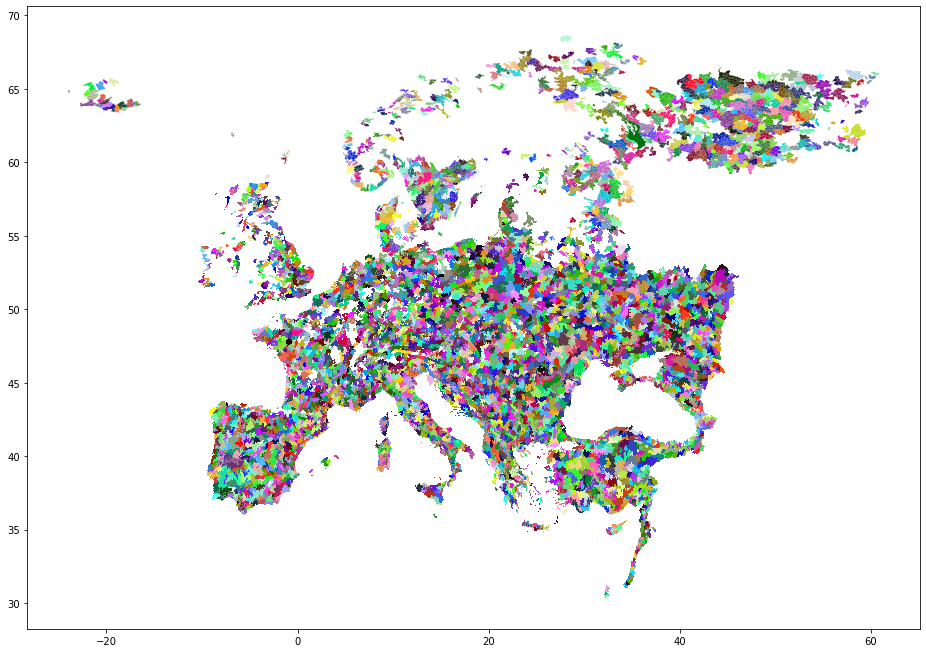

In [78]:
clusters = clustering.get_clusters_from_last_fathers(0.8)
plot_clusters_shp(shp, clusters, figsize=(16,16))

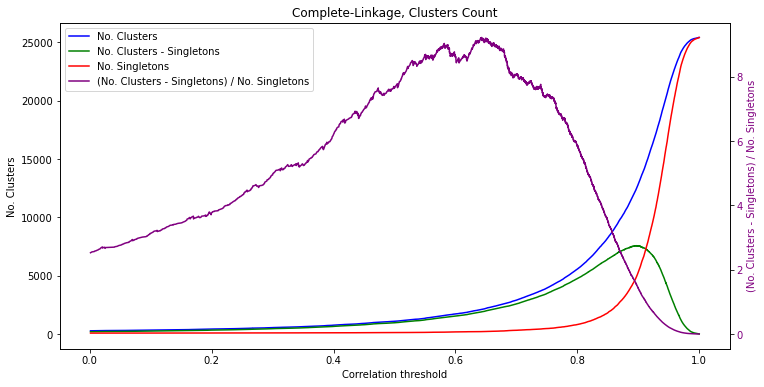

In [46]:
clustering.get_clustering_count_analysis()

No. clusters (w/o singletons) = 4752
No. singletons = 811


  0%|          | 27/25419 [00:00<06:29, 65.26it/s]

100%|██████████| 25419/25419 [01:56<00:00, 218.24it/s]


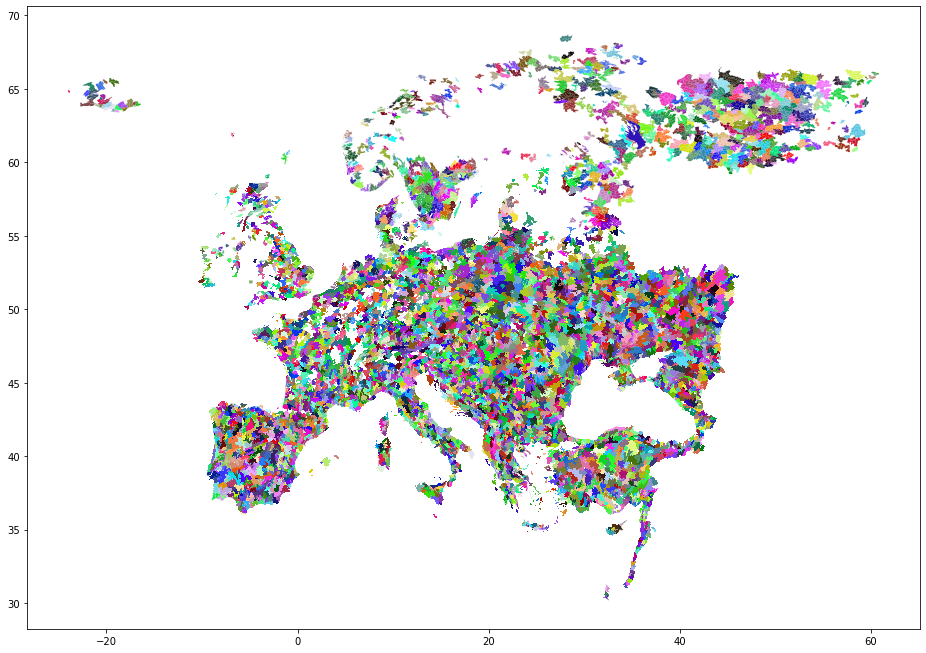

In [291]:
clusters = clustering.get_clusters_from_last_fathers(0.8)
plot_clusters_shp(shp, clusters, figsize=(16,16))

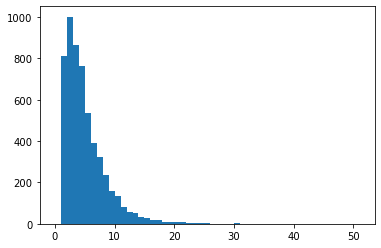

In [292]:
clusters_size = []
for cluster in clusters:
    clusters_size.append(len(cluster))

plt.hist(clusters_size, bins=np.array(range(clusters_size[0]+2)))
plt.show()

In [ ]:
clusters_weighted_mean = compute_clusters_mean(df, shp, clusters, weighted=True)
avg_corr_with_mean = correlations_sub_cluster(df, clusters, clusters_weighted_mean)
plot_corr_with_mean(clusters, avg_corr_with_mean)

In [312]:
avg_inter_corr, min_inter_corr, min_inter_corr_subids = compute_avg_min_internal_corr(df, clusters)

  0%|          | 0/4752 [00:00<?, ?it/s]

100%|██████████| 4752/4752 [00:22<00:00, 213.14it/s]

Avg. Total Internal Correlation (no singletons) : 0.899


avg_corr_with_mean: 0.918
avg_inter_corr: 0.814
min_inter_corr: 0.814


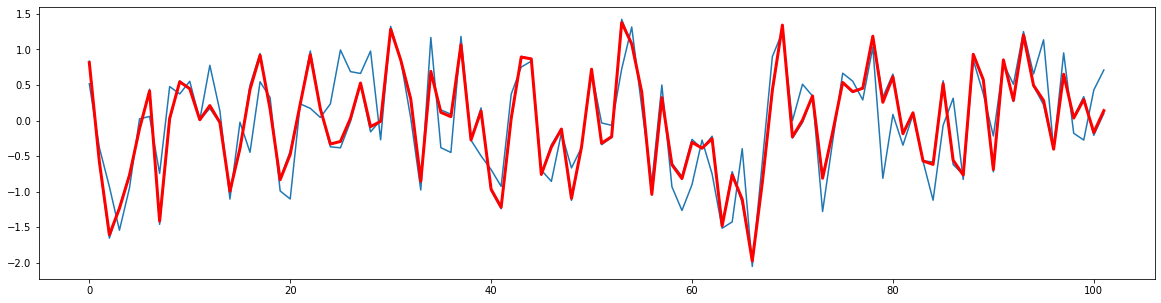

In [ ]:
plot_cluster_stats(df, 3799, clusters, clusters_weighted_mean, min_inter_corr_subids, avg_corr_with_mean, avg_inter_corr, min_inter_corr)

No. clusters (w/o singletons) = 964
No. singletons = 126


  0%|          | 0/25419 [00:00<?, ?it/s]

100%|██████████| 25419/25419 [01:38<00:00, 258.52it/s]


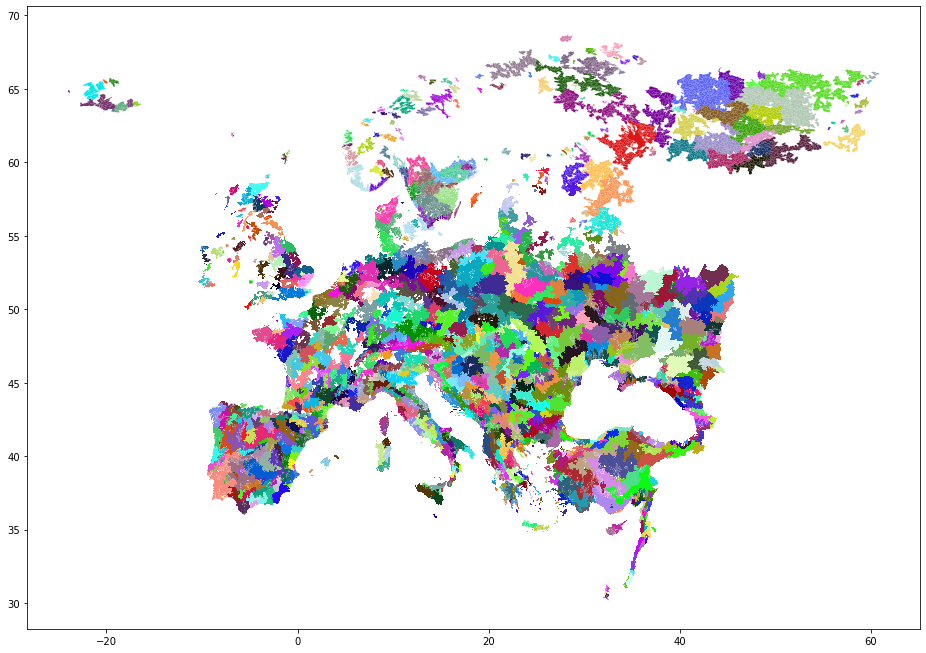

In [338]:
clusters = clustering.get_clusters_from_last_fathers(0.5)
plot_clusters_shp(shp, clusters, figsize=(16,16), only_stats=False)

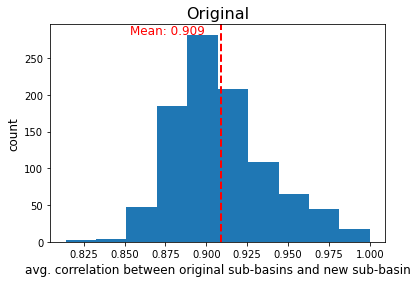

In [337]:
#clusters_weighted_mean = compute_clusters_mean(df, shp, clusters, weighted=True)
#avg_corr_with_mean = correlations_sub_cluster(df, clusters, clusters_weighted_mean)
plot_corr_with_mean(avg_corr_with_mean[:964])

avg_corr_with_mean: 0.873
avg_inter_corr: 0.762
min_inter_corr: 0.507


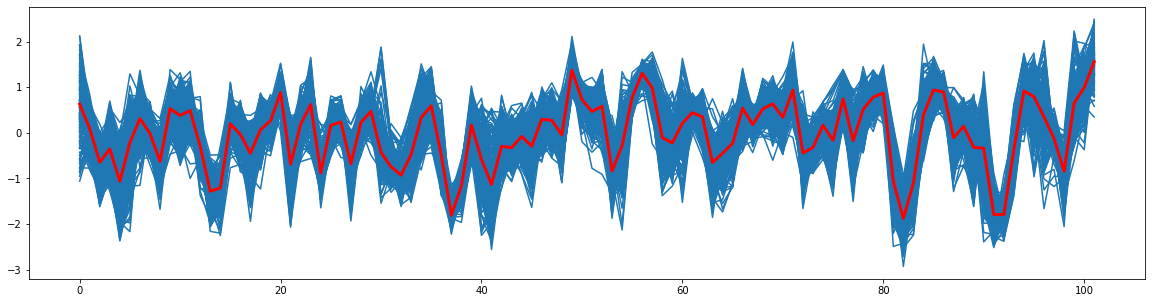

In [336]:
plot_cluster_stats(0, clusters, clusters_weighted_mean, min_inter_corr_subids, avg_corr_with_mean, avg_inter_corr, min_inter_corr)